In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

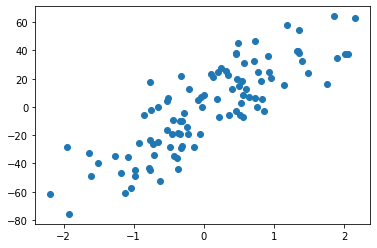

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


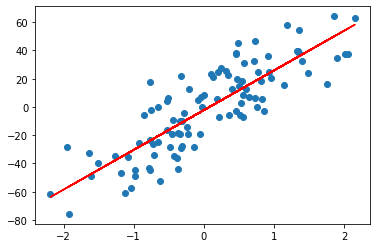

In [9]:
x = 28.12597332*X.ravel() - 2.2710144261783825
plt.plot(X,x,color='red')
plt.scatter(X,y)

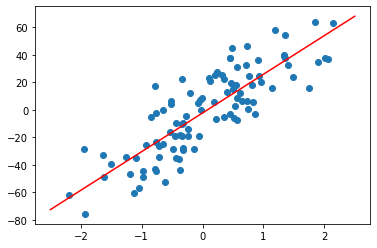

In [12]:
# OR
a = np.linspace(-2.5,2.5,100)
b = 28.12597332*a - 2.2710144261783825
plt.plot(a,b,color='red')
plt.scatter(X,y)

In [13]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [18]:
class GDRegressor:

  def __init__(self,learning_rate,epochs):
    self.lr = learning_rate
    self.epochs = epochs
    self.m = 100
    self.b = -120

  def fit(self,X,y):
    for i in range(self.epochs):
      loss_slope_b = -2*np.sum(y-self.m*X.ravel()-self.b)
      loss_slope_m = -2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
      self.m = self.m - self.lr*loss_slope_m
      self.b = self.b - self.lr*loss_slope_b
    print('Coeff=',self.m,' Intercept=', self.b)

  def predict(self,y):
    return self.m*y + self.b
    

In [19]:
gd = GDRegressor(0.001,50)

In [20]:
gd.fit(X_train,y_train)

Coeff= 28.159367347119066  Intercept= -2.3004574196824854


In [21]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579

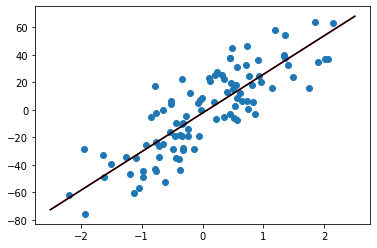

In [22]:
a = np.linspace(-2.5,2.5,100)
b = 28.12597332*a - 2.2710144261783825
c = 28.159367347119066*a - 2.3004574196824854
plt.plot(a,b,color='red')
plt.plot(a,c,color='black')
plt.scatter(X,y)